In [1]:
import glob

from torch.nn.functional import interpolate
from torch.utils.data import DataLoader

from inpainting import transforms
from inpainting.load import MergeDataset, ImageDataset
from inpainting.utils import normalize, denormalize, dilate
from inpainting.visualize import tensor_to_pil_image


In [2]:
images_dataset = ImageDataset(
    list(glob.glob(f'../data/raw/DAVIS/JPEGImages/tennis')),
    'image'
)
masks_dataset = ImageDataset(
    list(glob.glob(f'../data/interim/DAVIS/Masks/tennis')),
    'mask'
)
dataset = MergeDataset([images_dataset, masks_dataset], transform=transforms.ToTensor())
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [3]:
image, mask = next(iter(data_loader))

In [4]:
_, _, w, h = image.size()
image = normalize(interpolate(image, size=[w // 8 * 8, h // 8 * 8])).cuda()
mask = dilate(interpolate(mask, size=[w // 8 * 8, h // 8 * 8])).cuda()

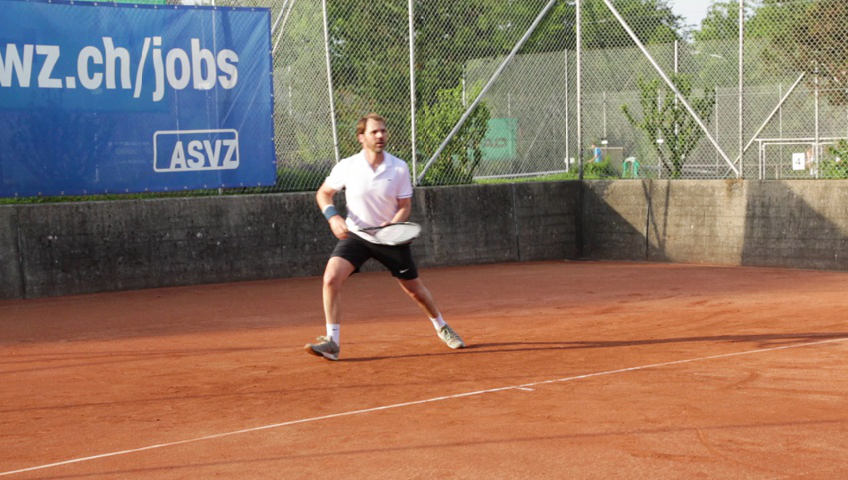

In [5]:
tensor_to_pil_image(denormalize(image))

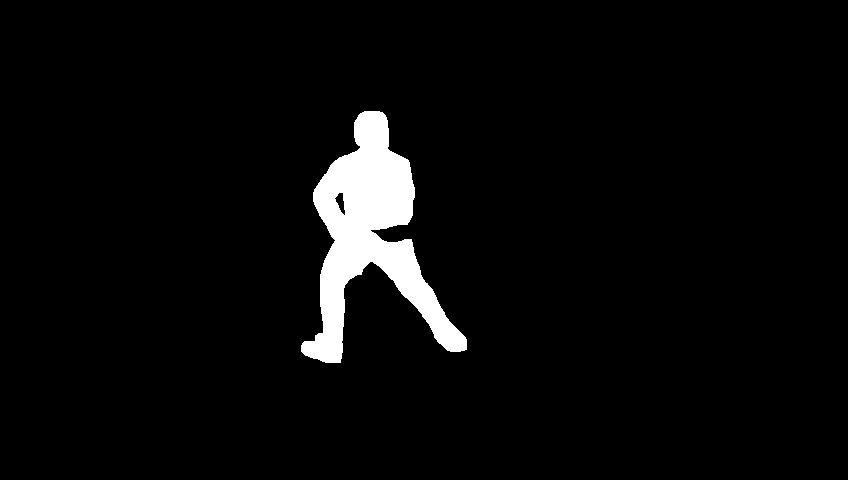

In [6]:
tensor_to_pil_image(mask)

In [ ]:
from inpainting.models.inpainting.deepfillv1.model import DeepFillV1Model

model = DeepFillV1Model('../models/external/deepfillv1/imagenet_deepfill.pth').cuda()
result = model(image, mask)
tensor_to_pil_image(denormalize(result))

C:\Users\jakub\anaconda3\envs\inpainting\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


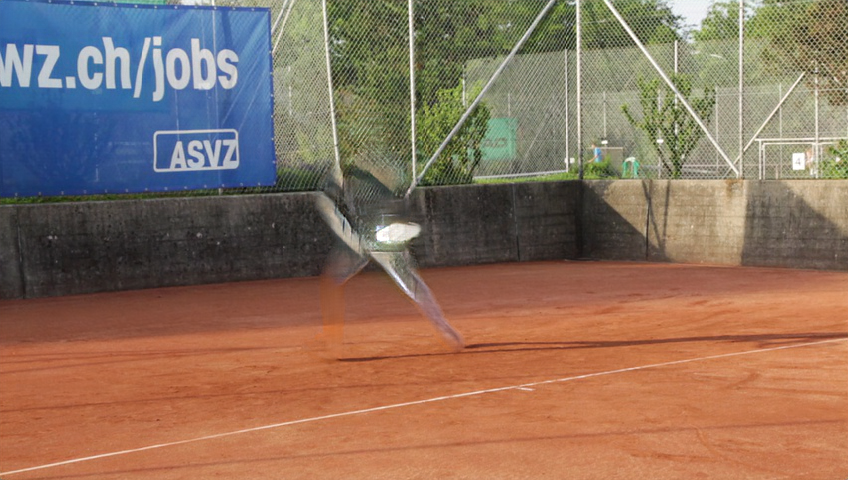

In [7]:
from inpainting.models.inpainting.deepfillv2.model import DeepFillV2Model

model = DeepFillV2Model('../models/external/deepfillv2/latest_ckpt.pth.tar').cuda()
result = model(image, mask)
tensor_to_pil_image(denormalize(result))

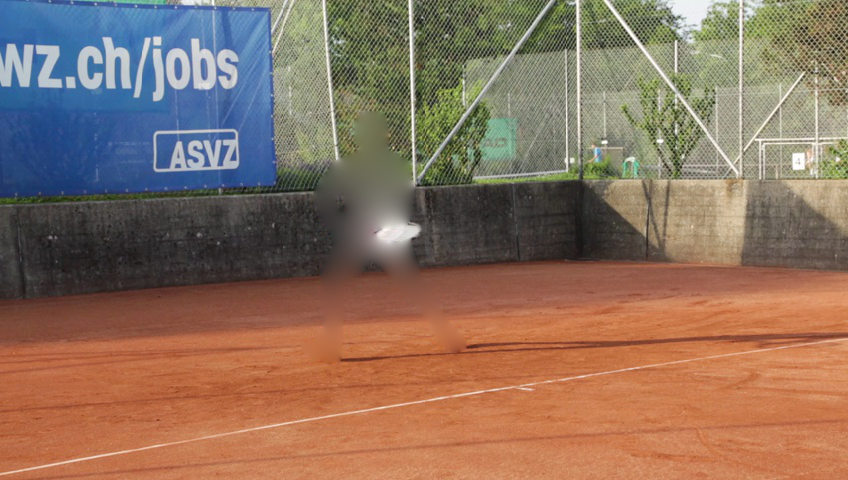

In [8]:
from inpainting.models.inpainting.kernel_inpainting import inpaint

result = inpaint(image, mask)
tensor_to_pil_image(denormalize(result))

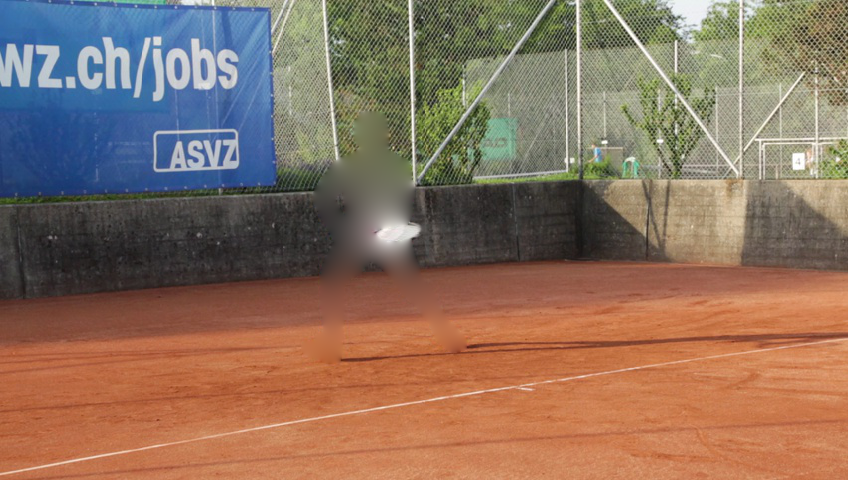

In [9]:
from inpainting.models.inpainting.region_fill import inpaint

result = inpaint(image, mask)
tensor_to_pil_image(denormalize(result))